# Market Snapshots Viewer
View and analyze market snapshot data for vertical spreads

In [74]:
import pandas as pd
import psycopg2
import json
import os
import sys
import matplotlib.pyplot as plt
from datetime import datetime

# Set pandas display options for better viewing
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

In [75]:
# Load database credentials
project_root = os.getcwd()
config_path = os.path.join(project_root, 'config')
sys.path.insert(0, config_path)

credentials_file = os.path.join(config_path, 'credentials.json')
with open(credentials_file, 'r') as f:
    creds = json.load(f)

pg_creds = creds['database']['postgresql']
pg_creds['host'] = '127.0.0.1'
pg_creds['port'] = 5433

print("Database credentials loaded")

Database credentials loaded


## View All Market Snapshots

In [76]:
def get_all_snapshots(pg_creds):
    """Retrieve all market snapshots from the database"""
    try:
        conn = psycopg2.connect(
            host=pg_creds['host'],
            port=pg_creds['port'],
            database=pg_creds['database'],
            user=pg_creds['user'],
            password=pg_creds['password']
        )
        
        query = """
        SELECT 
            id,
            db_trade_id,
            spread_market_val,
            spread_unrealized_pnl,
            spread_current_price,
            leg1_symbol,
            leg1_description,
            leg1_market_val,
            leg1_unrealized_pnl,
            leg1_current_price,
            leg1_position,
            leg2_symbol,
            leg2_description,
            leg2_market_val,
            leg2_unrealized_pnl,
            leg2_current_price,
            leg2_position,
            snapshot_time
        FROM market_snapshots
        ORDER BY snapshot_time DESC
        """
        
        df = pd.read_sql_query(query, conn)
        conn.close()
        return df
        
    except Exception as e:
        print(f"Error retrieving snapshots: {e}")
        return pd.DataFrame()

# Get all snapshots
all_snapshots_df = get_all_snapshots(pg_creds)
print(f"Total snapshots: {len(all_snapshots_df)}")
all_snapshots_df

Total snapshots: 16


/tmp/ipykernel_432777/4329924.py:36: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,id,db_trade_id,spread_market_val,spread_unrealized_pnl,spread_current_price,leg1_symbol,leg1_description,leg1_market_val,leg1_unrealized_pnl,leg1_current_price,leg1_position,leg2_symbol,leg2_description,leg2_market_val,leg2_unrealized_pnl,leg2_current_price,leg2_position,snapshot_time
0,66ebe724-9a59-47c8-8659-17bb0faa0afc,massive-lemming-of-fantasy,-2.07,171.34,-0.0207,UNH,UNH 20251024 390.0 C,-2.99,536.21,0.0299,-1.0,UNH,UNH 20251024 400.0 C,0.92,-364.87,0.0092,1.0,2025-10-24 07:41:07.897937
1,f4d41807-a7c3-4366-92fd-630a51302b7c,slug-of-incredible-prosperity,-24.73,94.01,-0.2473,SPY,SPY 20251107 620.0 P,60.93,-365.69,0.6093,1.0,SPY,SPY 20251107 629.0 P,-85.67,459.71,0.8567,-1.0,2025-10-24 07:41:07.547580
2,6f35b1be-4b9b-4ecb-998a-b14b61ae0982,esoteric-armored-tuatara,-46.46,77.29,-0.4646,NKE,NKE 20251031 55.0 P,0.67,-3.95,0.0067,1.0,NKE,NKE 20251031 67.0 P,-47.13,81.24,0.4713,-1.0,2025-10-24 07:41:07.192974
3,c43fb56c-b3e5-4a2f-b8c5-fe0ecfb902c5,smiling-misty-cougar,-12.86,78.07,-0.1286,NKE,NKE 20251024 60.0 P,0.01,-11.03,0.0001,1.0,NKE,NKE 20251024 68.0 P,-12.86,89.10,0.1286,-1.0,2025-10-24 07:41:06.824922
4,4a2c9603-cc08-4b40-a5eb-e6050de4daf1,loose-nondescript-chital,-0.46,117.94,-0.0046,META,META 20251024 645.0 P,1.93,-443.87,0.0193,1.0,META,META 20251024 655.0 P,-2.39,561.81,0.0239,-1.0,2025-10-24 07:41:06.433637
5,1c1aa76d-a9ab-4489-8296-20950591b3ec,funny-tangerine-serval,-18.05,140.69,-0.1805,IWM,IWM 20251031 260.0 C,-21.11,183.26,0.2111,-1.0,IWM,IWM 20251031 270.0 C,3.06,-42.57,0.0306,1.0,2025-10-24 07:41:06.071225
6,03cedfbd-0324-4a82-9994-1525ba3dc074,intrepid-serious-pillbug,-135.33,128.07,-1.3533,AMZN,AMZN 20251031 195.0 P,53.89,-301.90,0.5389,1.0,AMZN,AMZN 20251031 205.0 P,-189.23,429.98,1.8923,-1.0,2025-10-24 07:41:05.693362
7,ff425d20-fd0d-43e8-b778-0e307320e45a,screeching-boar-of-excitement,-35.44,178.30,-0.3544,AAPL,AAPL 20251031 230.0 P,14.54,-190.09,0.1454,1.0,AAPL,AAPL 20251031 240.0 P,-49.98,368.39,0.4998,-1.0,2025-10-24 07:41:05.315142
8,2bf8940f-5df3-46f7-9365-f0766b981a38,massive-lemming-of-fantasy,-2.07,171.34,-0.0207,UNH,UNH 20251024 390.0 C,-2.99,536.21,0.0299,-1.0,UNH,UNH 20251024 400.0 C,0.92,-364.87,0.0092,1.0,2025-10-24 06:41:59.343223
9,51a637ed-1a1a-4b21-9069-a16d0b1d4162,slug-of-incredible-prosperity,-24.73,94.01,-0.2473,SPY,SPY 20251107 620.0 P,60.93,-365.69,0.6093,1.0,SPY,SPY 20251107 629.0 P,-85.67,459.71,0.8567,-1.0,2025-10-24 06:41:59.011281


## Summary Statistics by Trade

In [77]:
def get_snapshot_summary(pg_creds):
    """Get summary statistics for each trade"""
    try:
        conn = psycopg2.connect(
            host=pg_creds['host'],
            port=pg_creds['port'],
            database=pg_creds['database'],
            user=pg_creds['user'],
            password=pg_creds['password']
        )
        
        query = """
        SELECT 
            db_trade_id,
            leg1_symbol as symbol,
            COUNT(*) as snapshot_count,
            MIN(snapshot_time) as first_snapshot,
            MAX(snapshot_time) as latest_snapshot,
            MIN(spread_unrealized_pnl) as min_pnl,
            MAX(spread_unrealized_pnl) as max_pnl,
            AVG(spread_unrealized_pnl) as avg_pnl,
            -- Latest values
            (SELECT spread_unrealized_pnl 
             FROM market_snapshots ms2 
             WHERE ms2.db_trade_id = ms1.db_trade_id 
             ORDER BY snapshot_time DESC LIMIT 1) as current_pnl,
            (SELECT spread_market_val 
             FROM market_snapshots ms2 
             WHERE ms2.db_trade_id = ms1.db_trade_id 
             ORDER BY snapshot_time DESC LIMIT 1) as current_market_val,
            (SELECT leg1_description 
             FROM market_snapshots ms2 
             WHERE ms2.db_trade_id = ms1.db_trade_id 
             ORDER BY snapshot_time DESC LIMIT 1) as leg1_desc,
            (SELECT leg2_description 
             FROM market_snapshots ms2 
             WHERE ms2.db_trade_id = ms1.db_trade_id 
             ORDER BY snapshot_time DESC LIMIT 1) as leg2_desc
        FROM market_snapshots ms1
        GROUP BY db_trade_id, leg1_symbol
        ORDER BY latest_snapshot DESC
        """
        
        df = pd.read_sql_query(query, conn)
        conn.close()
        return df
        
    except Exception as e:
        print(f"Error retrieving summary: {e}")
        return pd.DataFrame()

summary_df = get_snapshot_summary(pg_creds)
print(f"\nTrades with snapshots: {len(summary_df)}")
summary_df


Trades with snapshots: 8


/tmp/ipykernel_432777/2472650940.py:44: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,db_trade_id,symbol,snapshot_count,first_snapshot,latest_snapshot,min_pnl,max_pnl,avg_pnl,current_pnl,current_market_val,leg1_desc,leg2_desc
0,massive-lemming-of-fantasy,UNH,2,2025-10-24 06:41:59.343223,2025-10-24 07:41:07.897937,171.34,171.34,171.34,171.34,-2.07,UNH 20251024 390.0 C,UNH 20251024 400.0 C
1,slug-of-incredible-prosperity,SPY,2,2025-10-24 06:41:59.011281,2025-10-24 07:41:07.547580,94.01,94.01,94.01,94.01,-24.73,SPY 20251107 620.0 P,SPY 20251107 629.0 P
2,esoteric-armored-tuatara,NKE,2,2025-10-24 06:41:58.665657,2025-10-24 07:41:07.192974,77.29,77.29,77.29,77.29,-46.46,NKE 20251031 55.0 P,NKE 20251031 67.0 P
3,smiling-misty-cougar,NKE,2,2025-10-24 06:41:58.294031,2025-10-24 07:41:06.824922,78.07,78.07,78.07,78.07,-12.86,NKE 20251024 60.0 P,NKE 20251024 68.0 P
4,loose-nondescript-chital,META,2,2025-10-24 06:41:57.929268,2025-10-24 07:41:06.433637,117.94,117.94,117.94,117.94,-0.46,META 20251024 645.0 P,META 20251024 655.0 P
5,funny-tangerine-serval,IWM,2,2025-10-24 06:41:57.578075,2025-10-24 07:41:06.071225,140.69,140.69,140.69,140.69,-18.05,IWM 20251031 260.0 C,IWM 20251031 270.0 C
6,intrepid-serious-pillbug,AMZN,2,2025-10-24 06:41:57.227603,2025-10-24 07:41:05.693362,128.07,128.07,128.07,128.07,-135.33,AMZN 20251031 195.0 P,AMZN 20251031 205.0 P
7,screeching-boar-of-excitement,AAPL,2,2025-10-24 06:41:56.864639,2025-10-24 07:41:05.315142,178.30,178.30,178.30,178.30,-35.44,AAPL 20251031 230.0 P,AAPL 20251031 240.0 P


## View Snapshots for a Specific Trade

In [78]:
def get_snapshots_by_trade(trade_id, pg_creds):
    """Get all snapshots for a specific trade ID"""
    try:
        conn = psycopg2.connect(
            host=pg_creds['host'],
            port=pg_creds['port'],
            database=pg_creds['database'],
            user=pg_creds['user'],
            password=pg_creds['password']
        )
        
        query = """
        SELECT 
            snapshot_time,
            spread_market_val,
            spread_unrealized_pnl,
            spread_current_price,
            leg1_description,
            leg1_current_price,
            leg1_unrealized_pnl,
            leg1_position,
            leg2_description,
            leg2_current_price,
            leg2_unrealized_pnl,
            leg2_position
        FROM market_snapshots
        WHERE db_trade_id = %s
        ORDER BY snapshot_time ASC
        """
        
        df = pd.read_sql_query(query, conn, params=(trade_id,))
        conn.close()
        return df
        
    except Exception as e:
        print(f"Error retrieving snapshots for trade {trade_id}: {e}")
        return pd.DataFrame()

# Get unique trade IDs for selection
if not summary_df.empty:
    print("Available Trade IDs:")
    for idx, row in summary_df.iterrows():
        print(f"  - {row['db_trade_id']} ({row['symbol']}) - {row['snapshot_count']} snapshots")
    
    # Example: View first trade (change this to your desired trade_id)
    if len(summary_df) > 0:
        selected_trade_id = summary_df.iloc[0]['db_trade_id']
        print(f"\nShowing snapshots for: {selected_trade_id}")
        trade_snapshots_df = get_snapshots_by_trade(selected_trade_id, pg_creds)
        display(trade_snapshots_df)
else:
    print("No snapshots found in database")

Available Trade IDs:
  - massive-lemming-of-fantasy (UNH) - 2 snapshots
  - slug-of-incredible-prosperity (SPY) - 2 snapshots
  - esoteric-armored-tuatara (NKE) - 2 snapshots
  - smiling-misty-cougar (NKE) - 2 snapshots
  - loose-nondescript-chital (META) - 2 snapshots
  - funny-tangerine-serval (IWM) - 2 snapshots
  - intrepid-serious-pillbug (AMZN) - 2 snapshots
  - screeching-boar-of-excitement (AAPL) - 2 snapshots

Showing snapshots for: massive-lemming-of-fantasy


/tmp/ipykernel_432777/1507059813.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn, params=(trade_id,))


,snapshot_time,spread_market_val,spread_unrealized_pnl,spread_current_price,leg1_description,leg1_current_price,leg1_unrealized_pnl,leg1_position,leg2_description,leg2_current_price,leg2_unrealized_pnl,leg2_position
0,2025-10-24 06:41:59.343223,-2.07,171.34,-0.0207,UNH 20251024 390.0 C,0.0299,536.21,-1.0,UNH 20251024 400.0 C,0.0092,-364.87,1.0
1,2025-10-24 07:41:07.897937,-2.07,171.34,-0.0207,UNH 20251024 390.0 C,0.0299,536.21,-1.0,UNH 20251024 400.0 C,0.0092,-364.87,1.0


## Compare Current vs Historical Performance

In [79]:
def get_performance_comparison(pg_creds):
    """Compare first snapshot vs latest snapshot for each trade"""
    try:
        conn = psycopg2.connect(
            host=pg_creds['host'],
            port=pg_creds['port'],
            database=pg_creds['database'],
            user=pg_creds['user'],
            password=pg_creds['password']
        )
        
        query = """
        WITH first_snapshot AS (
            SELECT DISTINCT ON (db_trade_id)
                db_trade_id,
                leg1_symbol,
                leg1_description,
                leg2_description,
                spread_unrealized_pnl as initial_pnl,
                spread_market_val as initial_market_val,
                snapshot_time as first_time
            FROM market_snapshots
            ORDER BY db_trade_id, snapshot_time ASC
        ),
        latest_snapshot AS (
            SELECT DISTINCT ON (db_trade_id)
                db_trade_id,
                spread_unrealized_pnl as current_pnl,
                spread_market_val as current_market_val,
                snapshot_time as latest_time
            FROM market_snapshots
            ORDER BY db_trade_id, snapshot_time DESC
        )
        SELECT 
            f.db_trade_id,
            f.leg1_symbol as symbol,
            f.leg1_description,
            f.leg2_description,
            f.first_time,
            l.latest_time,
            f.initial_pnl,
            l.current_pnl,
            (l.current_pnl - f.initial_pnl) as pnl_change,
            f.initial_market_val,
            l.current_market_val,
            (l.current_market_val - f.initial_market_val) as market_val_change,
            EXTRACT(EPOCH FROM (l.latest_time - f.first_time))/3600 as hours_tracked
        FROM first_snapshot f
        JOIN latest_snapshot l ON f.db_trade_id = l.db_trade_id
        ORDER BY l.latest_time DESC
        """
        
        df = pd.read_sql_query(query, conn)
        conn.close()
        return df
        
    except Exception as e:
        print(f"Error retrieving performance comparison: {e}")
        return pd.DataFrame()

performance_df = get_performance_comparison(pg_creds)
if not performance_df.empty:
    print("\nPerformance Comparison (First vs Latest Snapshot)")
    display(performance_df)
else:
    print("No performance data available")


Performance Comparison (First vs Latest Snapshot)


/tmp/ipykernel_432777/3815580893.py:53: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,db_trade_id,symbol,leg1_description,leg2_description,first_time,latest_time,initial_pnl,current_pnl,pnl_change,initial_market_val,current_market_val,market_val_change,hours_tracked
0,massive-lemming-of-fantasy,UNH,UNH 20251024 390.0 C,UNH 20251024 400.0 C,2025-10-24 06:41:59.343223,2025-10-24 07:41:07.897937,171.34,171.34,0.0,-2.07,-2.07,0.0,0.985710
1,slug-of-incredible-prosperity,SPY,SPY 20251107 620.0 P,SPY 20251107 629.0 P,2025-10-24 06:41:59.011281,2025-10-24 07:41:07.547580,94.01,94.01,0.0,-24.73,-24.73,0.0,0.985705
2,esoteric-armored-tuatara,NKE,NKE 20251031 55.0 P,NKE 20251031 67.0 P,2025-10-24 06:41:58.665657,2025-10-24 07:41:07.192974,77.29,77.29,0.0,-46.46,-46.46,0.0,0.985702
3,smiling-misty-cougar,NKE,NKE 20251024 60.0 P,NKE 20251024 68.0 P,2025-10-24 06:41:58.294031,2025-10-24 07:41:06.824922,78.07,78.07,0.0,-12.86,-12.86,0.0,0.985703
4,loose-nondescript-chital,META,META 20251024 645.0 P,META 20251024 655.0 P,2025-10-24 06:41:57.929268,2025-10-24 07:41:06.433637,117.94,117.94,0.0,-0.46,-0.46,0.0,0.985696
5,funny-tangerine-serval,IWM,IWM 20251031 260.0 C,IWM 20251031 270.0 C,2025-10-24 06:41:57.578075,2025-10-24 07:41:06.071225,140.69,140.69,0.0,-18.05,-18.05,0.0,0.985693
6,intrepid-serious-pillbug,AMZN,AMZN 20251031 195.0 P,AMZN 20251031 205.0 P,2025-10-24 06:41:57.227603,2025-10-24 07:41:05.693362,128.07,128.07,0.0,-135.33,-135.33,0.0,0.985685
7,screeching-boar-of-excitement,AAPL,AAPL 20251031 230.0 P,AAPL 20251031 240.0 P,2025-10-24 06:41:56.864639,2025-10-24 07:41:05.315142,178.30,178.30,0.0,-35.44,-35.44,0.0,0.985681


## Spread vs Leg Breakdown (Latest Snapshot)

In [80]:
def get_latest_breakdown(pg_creds):
    """Get detailed breakdown of spread and legs for latest snapshot"""
    try:
        conn = psycopg2.connect(
            host=pg_creds['host'],
            port=pg_creds['port'],
            database=pg_creds['database'],
            user=pg_creds['user'],
            password=pg_creds['password']
        )
        
        query = """
        WITH latest AS (
            SELECT DISTINCT ON (db_trade_id)
                *
            FROM market_snapshots
            ORDER BY db_trade_id, snapshot_time DESC
        )
        SELECT 
            db_trade_id,
            leg1_symbol as symbol,
            snapshot_time,
            -- Spread totals
            spread_unrealized_pnl as spread_pnl,
            spread_market_val as spread_mkt_val,
            -- Leg 1
            leg1_description,
            leg1_position,
            leg1_current_price as leg1_price,
            leg1_unrealized_pnl as leg1_pnl,
            leg1_market_val as leg1_mkt_val,
            -- Leg 2
            leg2_description,
            leg2_position,
            leg2_current_price as leg2_price,
            leg2_unrealized_pnl as leg2_pnl,
            leg2_market_val as leg2_mkt_val,
            -- Calculated fields
            (leg1_unrealized_pnl + leg2_unrealized_pnl) as legs_pnl_sum,
            (spread_unrealized_pnl - (leg1_unrealized_pnl + leg2_unrealized_pnl)) as pnl_variance
        FROM latest
        ORDER BY snapshot_time DESC
        """
        
        df = pd.read_sql_query(query, conn)
        conn.close()
        return df
        
    except Exception as e:
        print(f"Error retrieving breakdown: {e}")
        return pd.DataFrame()

breakdown_df = get_latest_breakdown(pg_creds)
if not breakdown_df.empty:
    print("\nLatest Snapshot - Spread vs Leg Breakdown")
    display(breakdown_df)
else:
    print("No breakdown data available")


Latest Snapshot - Spread vs Leg Breakdown


/tmp/ipykernel_432777/1754726356.py:45: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,db_trade_id,symbol,snapshot_time,spread_pnl,spread_mkt_val,leg1_description,leg1_position,leg1_price,leg1_pnl,leg1_mkt_val,leg2_description,leg2_position,leg2_price,leg2_pnl,leg2_mkt_val,legs_pnl_sum,pnl_variance
0,massive-lemming-of-fantasy,UNH,2025-10-24 07:41:07.897937,171.34,-2.07,UNH 20251024 390.0 C,-1.0,0.0299,536.21,-2.99,UNH 20251024 400.0 C,1.0,0.0092,-364.87,0.92,171.34,0.00
1,slug-of-incredible-prosperity,SPY,2025-10-24 07:41:07.547580,94.01,-24.73,SPY 20251107 620.0 P,1.0,0.6093,-365.69,60.93,SPY 20251107 629.0 P,-1.0,0.8567,459.71,-85.67,94.02,-0.01
2,esoteric-armored-tuatara,NKE,2025-10-24 07:41:07.192974,77.29,-46.46,NKE 20251031 55.0 P,1.0,0.0067,-3.95,0.67,NKE 20251031 67.0 P,-1.0,0.4713,81.24,-47.13,77.29,0.00
3,smiling-misty-cougar,NKE,2025-10-24 07:41:06.824922,78.07,-12.86,NKE 20251024 60.0 P,1.0,0.0001,-11.03,0.01,NKE 20251024 68.0 P,-1.0,0.1286,89.10,-12.86,78.07,0.00
4,loose-nondescript-chital,META,2025-10-24 07:41:06.433637,117.94,-0.46,META 20251024 645.0 P,1.0,0.0193,-443.87,1.93,META 20251024 655.0 P,-1.0,0.0239,561.81,-2.39,117.94,0.00
5,funny-tangerine-serval,IWM,2025-10-24 07:41:06.071225,140.69,-18.05,IWM 20251031 260.0 C,-1.0,0.2111,183.26,-21.11,IWM 20251031 270.0 C,1.0,0.0306,-42.57,3.06,140.69,0.00
6,intrepid-serious-pillbug,AMZN,2025-10-24 07:41:05.693362,128.07,-135.33,AMZN 20251031 195.0 P,1.0,0.5389,-301.90,53.89,AMZN 20251031 205.0 P,-1.0,1.8923,429.98,-189.23,128.08,-0.01
7,screeching-boar-of-excitement,AAPL,2025-10-24 07:41:05.315142,178.30,-35.44,AAPL 20251031 230.0 P,1.0,0.1454,-190.09,14.54,AAPL 20251031 240.0 P,-1.0,0.4998,368.39,-49.98,178.30,0.00


## Plot Quick P&L Chart for a Trade

Plotting P&L history for: massive-lemming-of-fantasy


/home/cdodd/optcom/market_snapshot_utils.py:242: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn, params=(position_identifier,))
/home/cdodd/optcom/market_snapshot_utils.py:302: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  position_info = pd.read_sql_query(position_query, conn, params=(position_identifier,))


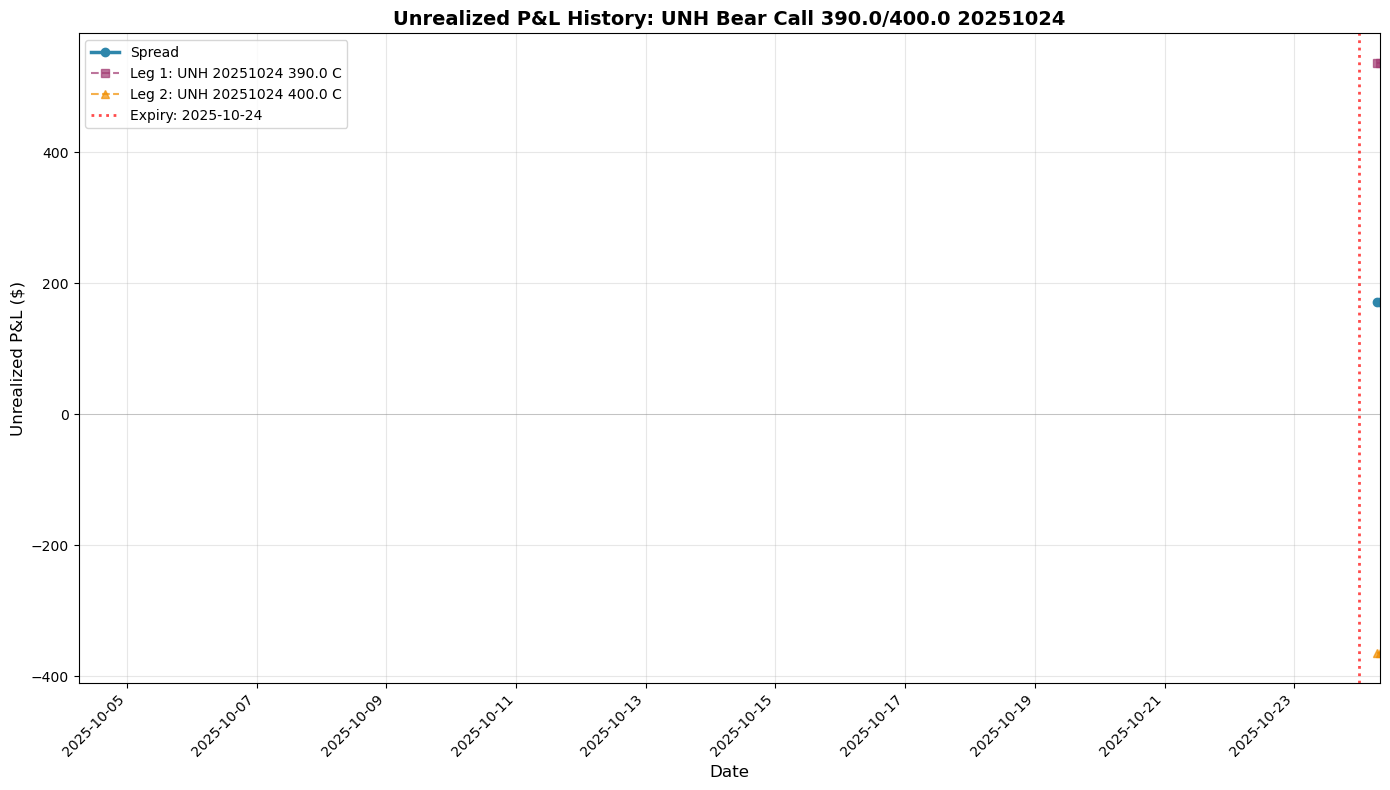

In [81]:
# Import plotting utilities
sys.path.insert(0, '/home/cdodd/optcom')
from market_snapshot_utils import plot_position_history

# Select a trade to plot (change this to your desired trade_id)
if not summary_df.empty:
    selected_trade_id = summary_df.iloc[0]['db_trade_id']
    print(f"Plotting P&L history for: {selected_trade_id}")
    
    fig = plot_position_history(
        position_identifier=selected_trade_id,
        pg_creds=pg_creds,
        use_trade_id=True,
        metric='unrealized_pnl',
        figsize=(14, 8)
    )
    
    if fig:
        plt.show()
else:
    print("No trades available to plot")

## Export Snapshots to CSV (Optional)

In [82]:
# Uncomment to export all snapshots to CSV
# if not all_snapshots_df.empty:
#     output_file = '/home/cdodd/optcom/market_snapshots_export.csv'
#     all_snapshots_df.to_csv(output_file, index=False)
#     print(f"Exported {len(all_snapshots_df)} snapshots to {output_file}")

print("Snapshot viewer notebook complete!")

Snapshot viewer notebook complete!
